# Pertemuan ke 5 - Distribusi Normal

In [1]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv('kawal-covid-data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Kasus baru'] = df['Kasus baru'].str.replace(',','').astype(int)
df['Sembuh\n(baru)'] = df['Sembuh\n(baru)'].str.replace(',','').astype(int)
# df = df[['Date','Kasus baru', 'Sembuh\n(baru)']]
df.set_index('Date', inplace=True)
df

,Kasus baru,Kasus Impor,Kasus Lokal,Total kasus,Kasus aktif,% kasus aktif,Sembuh\n(baru),Sembuh,Tingkat kesembuhan (seluruh kasus),Tingkat kesembuhan (closed cases),Meninggal\n(baru),Meninggal\nDunia,Tingkat kematian (seluruh kasus)
Date,,,,,,,,,,,,,
2020-03-02,2,0.0,2.0,2,2,100.00%,0,0,0.00%,0,0,0,0.00%
2020-03-03,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%
2020-03-04,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%
2020-03-05,0,0.0,0.0,2,2,100.00%,0,0,0.00%,NaN,0,0,0.00%
2020-03-06,2,0.0,2.0,4,4,100.00%,0,0,0.00%,NaN,0,0,0.00%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-29,3308,NaN,NaN,"169,195","39,132",23.13%,1902,"122,802",72.58%,94.42%,92,"7,261",4.29%
2020-08-30,2858,NaN,NaN,"172,053","40,525",23.55%,1383,"124,185",72.18%,94.42%,82,"7,343",4.27%
2020-08-31,2743,NaN,NaN,"174,796","41,420",23.70%,1774,"125,959",72.06%,94.44%,74,"7,417",4.24%


In [9]:
import matplotlib.pyplot as plt

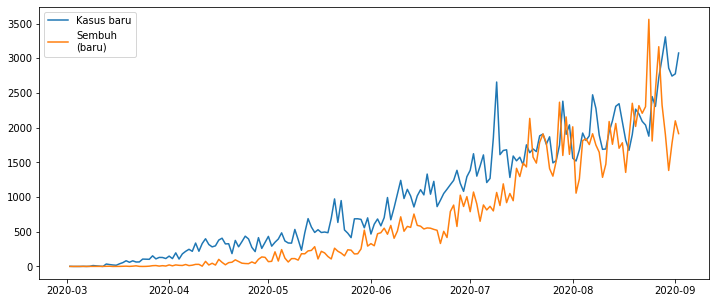

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df)
plt.legend(df.columns)

In [13]:
import seaborn as sns
sns.set()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


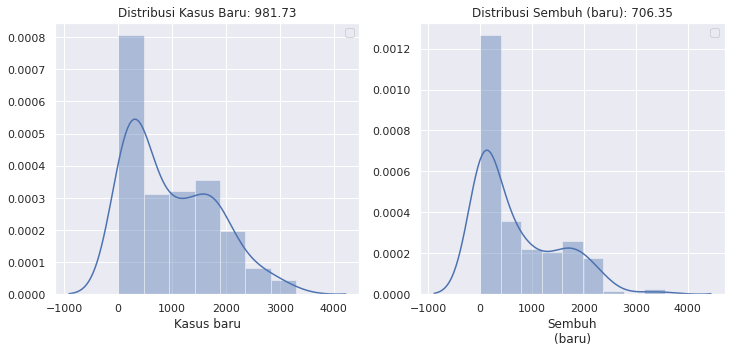

In [22]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(df['Kasus baru'], norm_hist=True)
plt.title('Distribusi Kasus Baru: %.2f' % df['Kasus baru'].mean())
plt.legend()

plt.subplot(1, 2, 2)
sns.distplot(df['Sembuh\n(baru)'], norm_hist=True)
plt.title('Distribusi Sembuh (baru): %.2f' % df['Sembuh\n(baru)'].mean())
plt.legend()

In [23]:
rata_rata_kasus_baru = df['Kasus baru'].mean()
rata_rata_sembuh = df['Sembuh\n(baru)'].mean()


In [24]:
rata_rata_sembuh / rata_rata_kasus_baru

0.7194957899456929

In [26]:
import pandas_datareader.data as web

/home/robin/.local/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [48]:
btc = web.DataReader('BTC-USD', 'yahoo', '2018-01-01', '2020-09-02')
btc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,14377.400391,12755.599609,12897.700195,14156.400391,1.213630e+10,14156.400391
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,1.029120e+10,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,1.684660e+10,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,1.687190e+10,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,2.178320e+10,15599.200195
...,...,...,...,...,...,...
2020-08-28,11585.640625,11466.292969,11541.054688,11506.865234,1.748560e+10,11506.865234
2020-08-29,11715.264648,11492.381836,11508.713867,11711.505859,1.976013e+10,11711.505859
2020-08-30,11768.876953,11598.318359,11713.306641,11680.820312,2.228593e+10,11680.820312


Text(0, 0.5, 'Price (USD)')

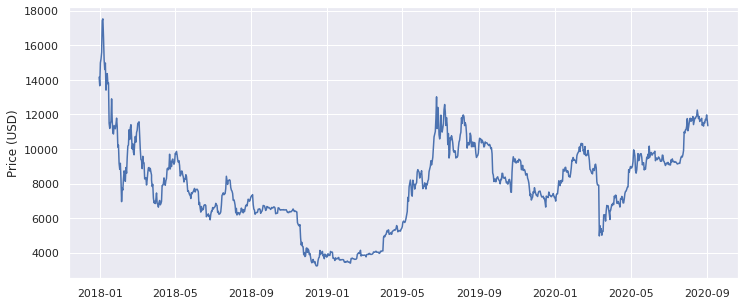

In [49]:
plt.figure(figsize=(12, 5))
plt.plot(btc['Close'])
plt.ylabel('Price (USD)')

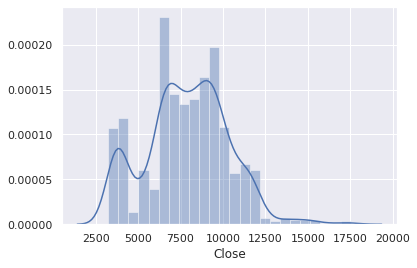

In [50]:
sns.distplot(btc['Close'])

In [51]:
btc['Close'].mean()

7877.92997666656

## Simulasi Monte Carlo

In [54]:
prices = btc['Close'] * 14800

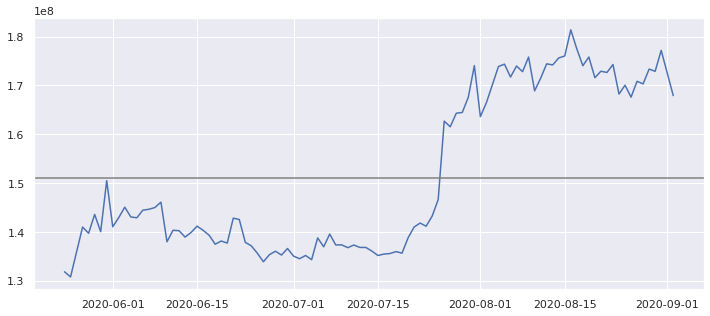

In [74]:
plt.figure(figsize=(12,5))
prices = prices[-100:]
plt.plot(prices)
plt.axhline(y=prices.mean(), color='grey')

In [75]:
prices.mean(), prices.std()

(151011319.0, 16306788.03587203)

In [76]:
prices.mean() / prices.std()

9.260641560300042

In [90]:
rets = prices.pct_change()

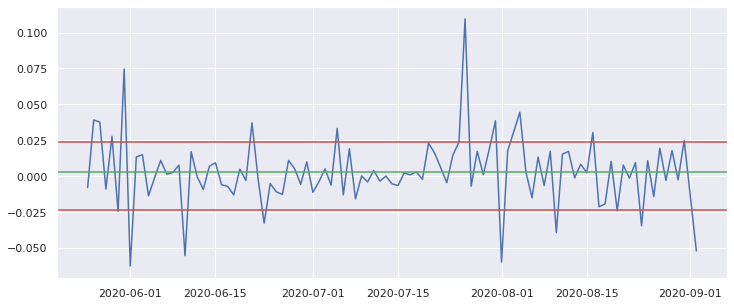

In [97]:
plt.figure(figsize=(12, 5))
plt.plot(rets)
plt.axhline(y=rets.mean(), color='g')
plt.axhline(y=rets.std(), color='r')
plt.axhline(y=-rets.std(), color='r')

In [93]:
rets.std()

0.023900635647936833

In [269]:
rata2 = rets.mean()
rata2jarak = rets.std()
durasi_prediksi = 7 # satu minggu
jumlah_simulasi = 1000000

In [270]:
(1 * rata2jarak) * harga[-1]

4461693.949580994

In [ ]:
from tqdm import tqdm
np.random.seed(0)
hasil = pd.DataFrame()
for i in tqdm(range(jumlah_simulasi)):
    harga = list(prices.copy().values)
    for d in range(durasi_prediksi):
        harga.append(harga[-1] * (1 + np.random.normal(0, rata2jarak)) )
    hasil[i] = pd.Series(harga[-durasi_prediksi:]).values

In [ ]:
# plt.figure(figsize=(12,5))
# plt.plot(hasil)
# plt.show()

In [ ]:
ratakan = hasil.values.ravel()
ratakan.mean()

In [ ]:
def currency(num):
    return "{:,.0f}".format(num)

In [ ]:
sns.distplot(hasil, norm_hist=True)
plt.xlabel("Kemungkinan terbesar: %s" % currency(ratakan.mean()))
plt.show()

In [ ]:
currency(harga[-1])

In [ ]:
currency(ratakan.mean() - harga[-1])